<a href="https://colab.research.google.com/github/anochima/Intro-to-CV/blob/master/Learning_Open_CV_(RGB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [2]:
# Import an RGB image to work with
def get_image(path, grayscale=False, mplt=False):
  """
  Display an RGB image
  Args:
    path: file path to image
    grayscale: if False image is displayed normal else image is turned to grayscale
    mplt: if true, image is displayed using the matplotlib library
  Returns:
    returns and image ndarray
  """
  image_tensor = cv2.imread(path, cv2.IMREAD_GRAYSCALE if grayscale == True else 1)
  if mplt == True :
    print('Using Matplotlib')
    plt.imshow(image_tensor) 
  else:
    print('Using OpenCV')
    cv2_imshow(image_tensor)
  return image_tensor

Using OpenCV


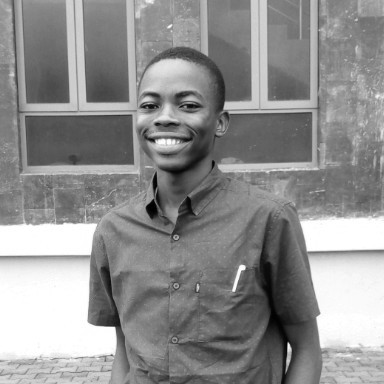

(384, 384)

In [3]:
gray_image = get_image('/content/drive/MyDrive/me.jpg', True)
gray_image.shape

Using OpenCV


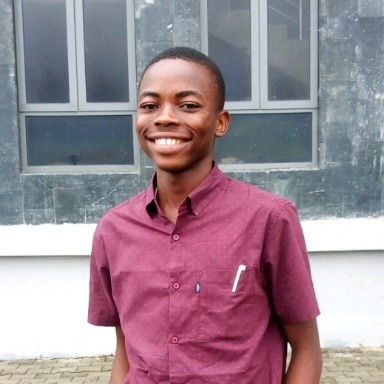

In [4]:
colored_image = image = get_image('/content/drive/MyDrive/me.jpg')
# Now due to openCV color channels are displayed as BGR instead of RGB lets flip the array to become RGB 😊
colored_image = colored_image[:,:,::-1]

In [5]:
colored_image.shape

(384, 384, 3)

`Colored` images are 3 dimensional while `Grayscale's` are 2 dimensional

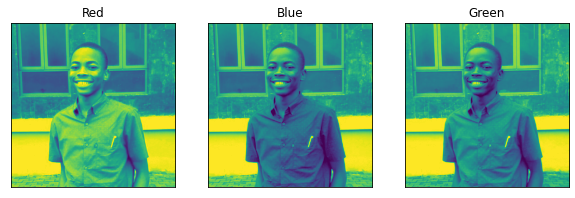

In [6]:
plt.figure(figsize=(10,7));

plt.subplot(131)
plt.imshow(colored_image[:,:,0])
plt.title('Red')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(colored_image[:,:,1])
plt.title('Blue')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(colored_image[:,:,2])
plt.title('Green')
plt.xticks([])
plt.yticks([]);

## Assignment: Create an image of 3 Dimensions showing BGR and another RGB

Using Matplotlib


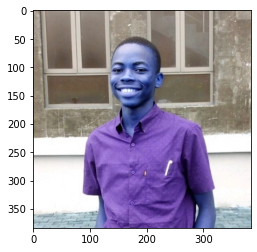

In [7]:
RGB = get_image('/content/drive/MyDrive/me.jpg', mplt=True)

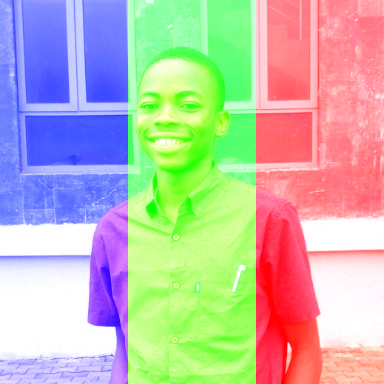

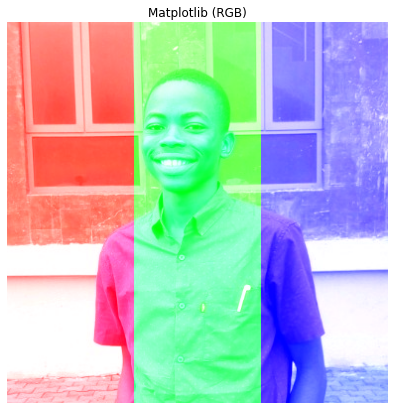

In [8]:
RGB[:,0:int(len(RGB)/3), 0] = 255 #Red Channel
RGB[:, int(len(RGB)/3):int(len(RGB)/3 *2), 1] = 255 # Green Channel
RGB[:, int(len(RGB)/3 *2):,2] = 255 # Blue Channel

#CV2 (BGR)
cv2_imshow(RGB)

plt.figure(figsize=(10, 7))
plt.title('Matplotlib (RGB)')
plt.imshow(RGB)
plt.axis('off');

## Colour Space (HSV Example)
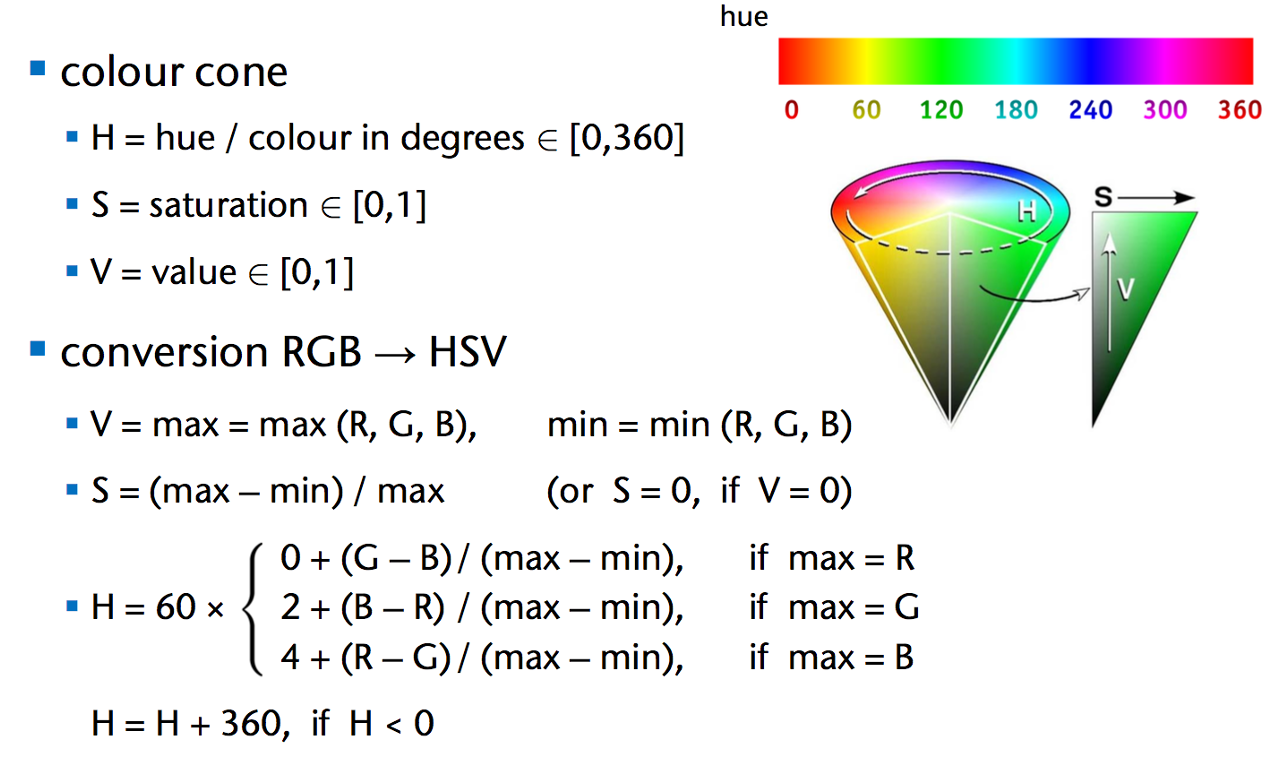

## Custom RGB TO HSV image conversion Algorithm


In [9]:
# Color Space

def rgb_to_hsv(R,G,B, scaleFactor):
  # scale values to be between 1 and 0 alias Normalization 
  R /= 255.0
  G /= 255.0
  B /= 255.0

  maxVal = max(R,G,B)
  minVal = min(R,G,B)
  diff = maxVal-minVal
  
  saturation = diff / maxVal * scaleFactor if not maxVal or minVal < 1 else 0

  if maxVal == R:
    hue = 60 * (0 + (G-B)/diff)
  elif maxVal == G:
    hue = 60 * (2+(B-R)/diff)
  else:
    hue = 60 * (4+(R-G)/diff)

  # hue += 360 if hue < 0 else hue

  value = maxVal * scaleFactor

  return hue, saturation, value


rgb_to_hsv(100,200,50, 100)


(100.0, 75.0, 78.43137254901961)

## Using the OpenCV builtin method for RGB to HSV conversion

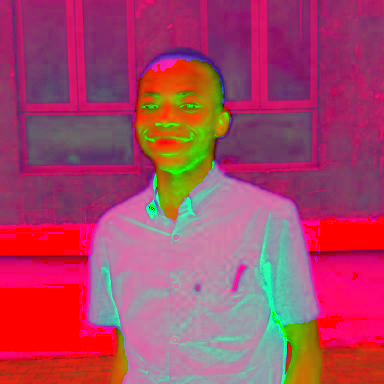

In [10]:
image = cv2.imread('/content/drive/MyDrive/me.jpg')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv_image)

## Now the question is **Why do we convert RGB to HSV**?
The HSV model describes colors similarly to how the human eye tends to perceive color. RGB defines color in terms of a combination of primary colors. In situations where color description plays an integral role, the HSV color model is often preferred over the RGB model.

source: [Quora](https://www.quora.com/Why-do-we-convert-RGB-to-HSV)

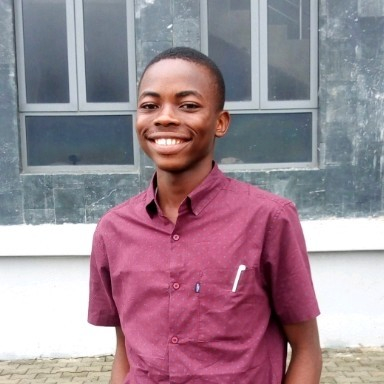

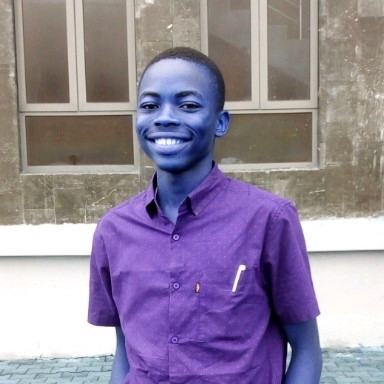

In [11]:
# Assignment: Convert HSV image back to RGB and BGR

rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
cv2_imshow(rgb_image)

bgr_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
cv2_imshow(bgr_image)


## Image Extraction or Segmentation using HSV
* Convert image to HSV
* create pixel ranges


--2021-12-19 18:21:43--  https://images.ctfassets.net/i3tkg7dt3kro/67NGLQ0tgzROTztUiWhdtu/2766da1ea764965b012fcf9704fa5f8b/Flowers-last-longer-Hero.jpg
Resolving images.ctfassets.net (images.ctfassets.net)... 65.8.249.89, 65.8.249.110, 65.8.249.111, ...
Connecting to images.ctfassets.net (images.ctfassets.net)|65.8.249.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360807 (352K) [image/jpeg]
Saving to: ‘Flowers-last-longer-Hero.jpg’

Flowers-last-longer 100%[===================>] 352.35K  --.-KB/s    in 0.08s   

2021-12-19 18:21:43 (4.25 MB/s) - ‘Flowers-last-longer-Hero.jpg’ saved [360807/360807]

Using Matplotlib


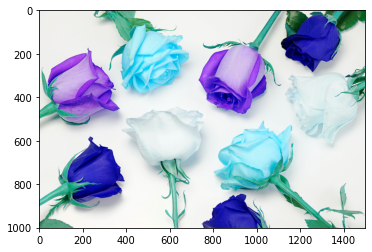

In [12]:
# Get the image
! wget 'https://images.ctfassets.net/i3tkg7dt3kro/67NGLQ0tgzROTztUiWhdtu/2766da1ea764965b012fcf9704fa5f8b/Flowers-last-longer-Hero.jpg'
rgb_image = get_image('/content/Flowers-last-longer-Hero.jpg', mplt=True)

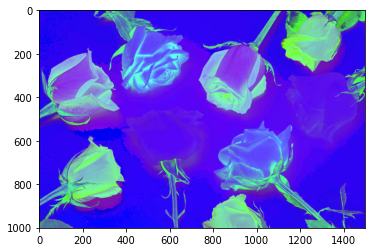

In [13]:
# We'll try to capture the rose flowers in the image above
hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_image)

## Plot a 3D graph to visualize how scattered the colors are

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors, cm

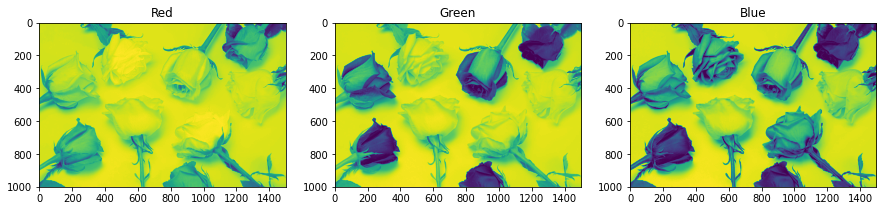

In [15]:
# Split our rgb image
R,G,B = cv2.split(rgb_image[:,:, ::-1])

plt.figure(figsize=(15,8))
plt.subplot(131)
plt.title('Red')
plt.imshow(R)

plt.subplot(132)
plt.title('Green')
plt.imshow(G)

plt.subplot(133)
plt.title('Blue')
plt.imshow(B)

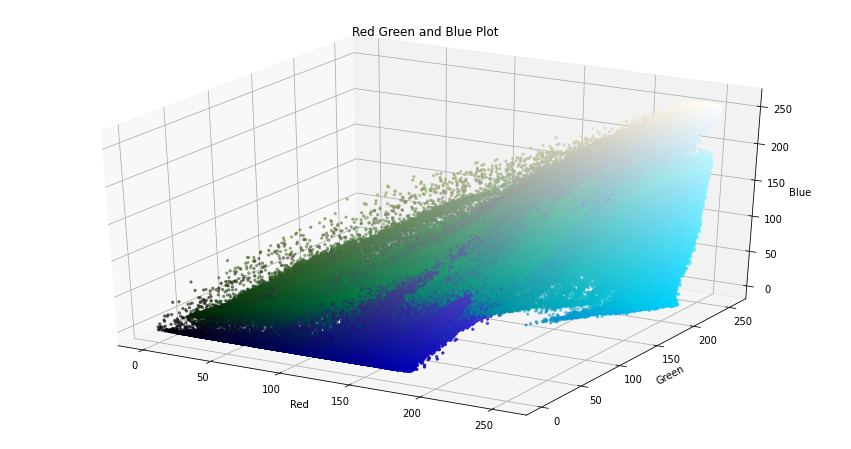

In [16]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1, projection='3d')

pixel_colors = rgb_image.reshape((np.shape(rgb_image)[0]*np.shape(rgb_image)[1],3))
normalize = colors.Normalize(vmin=-1., vmax=1.)
normalize.autoscale(pixel_colors)
pixel_colors = normalize(pixel_colors).tolist()


# Plotting our image
ax.scatter(R.flatten(),G.flatten(),B.flatten(), facecolors=pixel_colors, marker=".")
plt.title('Red Green and Blue Plot')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

plt.show();

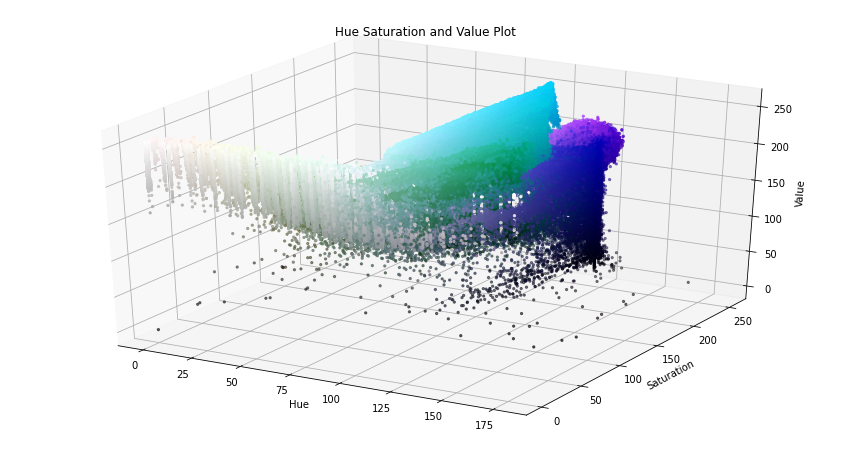

In [17]:
H,S,V = cv2.split(hsv_image)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1,projection="3d")

ax.scatter(H.flatten(),S.flatten(),V.flatten(), facecolors=pixel_colors, marker=".")
plt.title('Hue Saturation and Value Plot')
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show();

The red dots are almost impossible to visualize, hence they seem visually inseparable 😧

Using OpenCV


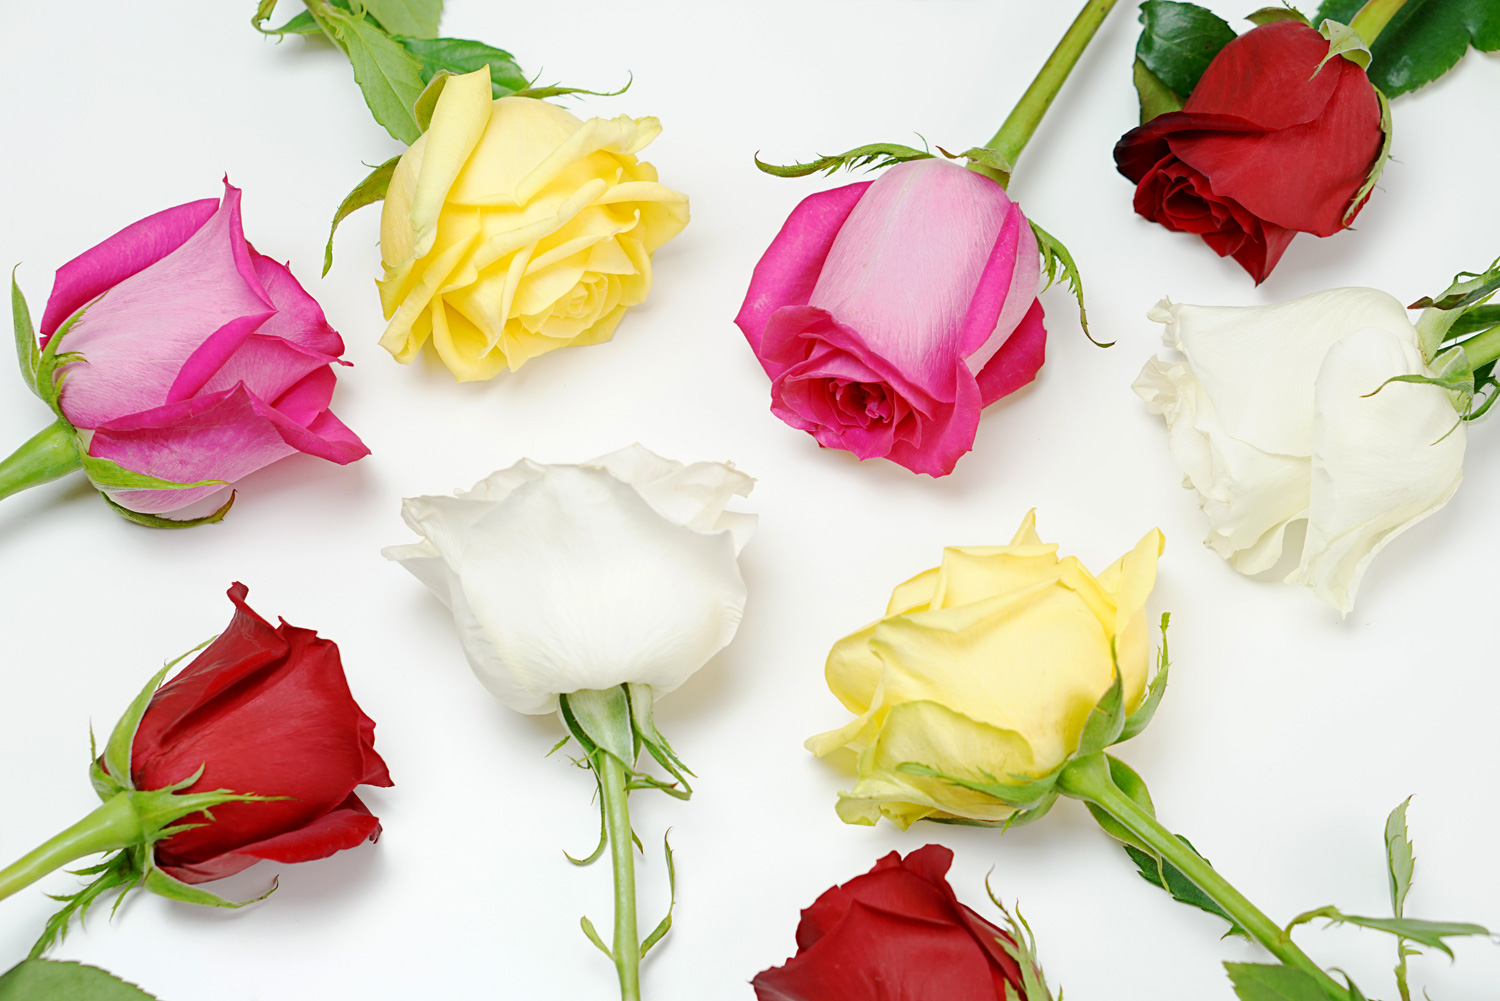

In [18]:
# See what my image looks like again
rgb_image = get_image('/content/Flowers-last-longer-Hero.jpg', mplt=False)
hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)

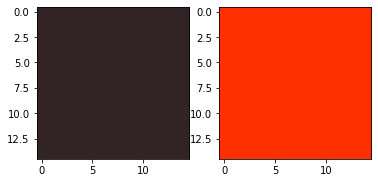

In [19]:
lower_range = (0, 70, 50)
higher_range = (8,255,255)

red_mask = cv2.inRange(hsv_image,lower_range, higher_range)


from matplotlib.colors import hsv_to_rgb
lower_color= np.full((15, 15, 3), lower_range, dtype=np.uint8) / 255.0
higher_color= np.full((15, 15, 3), higher_range, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lower_color))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(higher_color))
plt.show()


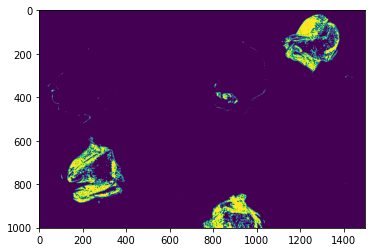

In [20]:
plt.imshow(red_mask)

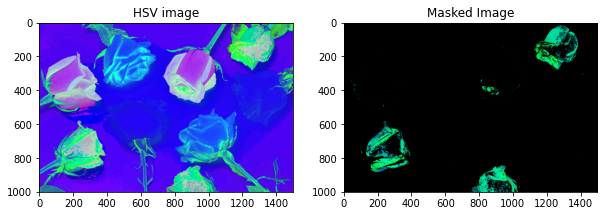

In [21]:
res_image = cv2.bitwise_and(hsv_image, hsv_image, mask=red_mask)

plt.figure(figsize=(10,7))
plt.subplot(121)
plt.title('HSV image')
plt.imshow(hsv_image)

plt.subplot(122)
plt.title('Masked Image')
plt.imshow(res_image)
plt.show();

## Example No.2

In [22]:
!wget 'https://i.pinimg.com/originals/72/f3/7d/72f37d953163dc58cbd825839b5bc882.png'
import os
if '72f37d953163dc58cbd825839b5bc882.png' in os.listdir():
  os.rename('72f37d953163dc58cbd825839b5bc882.png', 'mapAfrik.png')

--2021-12-19 18:23:32--  https://i.pinimg.com/originals/72/f3/7d/72f37d953163dc58cbd825839b5bc882.png
Resolving i.pinimg.com (i.pinimg.com)... 23.62.168.244, 2606:4700::6812:eb0, 2606:4700::6812:fb0
Connecting to i.pinimg.com (i.pinimg.com)|23.62.168.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12465 (12K) [image/png]
Saving to: ‘72f37d953163dc58cbd825839b5bc882.png’

72f37d953163dc58cbd 100%[===================>]  12.17K  --.-KB/s    in 0s      

2021-12-19 18:23:32 (133 MB/s) - ‘72f37d953163dc58cbd825839b5bc882.png’ saved [12465/12465]



Using Matplotlib


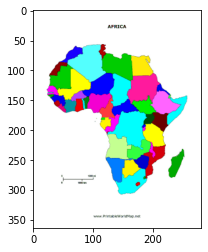

In [23]:
map_rgb = get_image('/content/mapAfrik.png', mplt=True)

In [24]:
map_hsv = cv2.cvtColor(map_rgb, cv2.COLOR_RGB2HSV)

Using Matplotlib


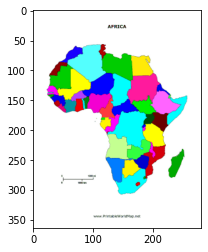

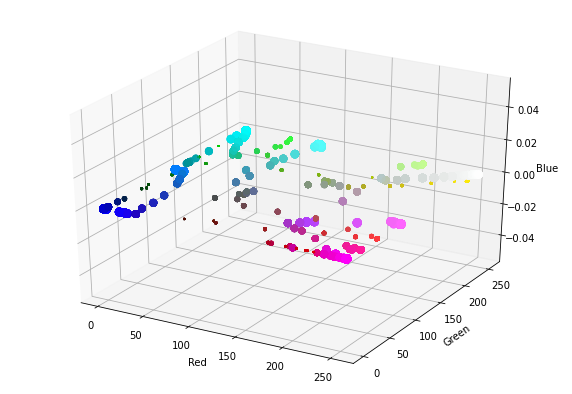

In [25]:
from matplotlib import colors, cm
from mpl_toolkits.mplot3d import Axes3D

# Split the RGB colors 
R,G,B = cv2.split(get_image('/content/mapAfrik.png', mplt=True))

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1, projection="3d")
pixel_colors = map_rgb.reshape((np.shape(map_rgb)[0]*np.shape(map_rgb)[1], 3))
normalize = colors.Normalize(vmin=-1., vmax=1.)
normalize.autoscale(pixel_colors)
pixel_colors = normalize(pixel_colors).tolist()


# Flatten and plot our RGB Values
plt.scatter(R.flatten(), G.flatten(), B.flatten(), facecolors=pixel_colors, marker=".")
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show();

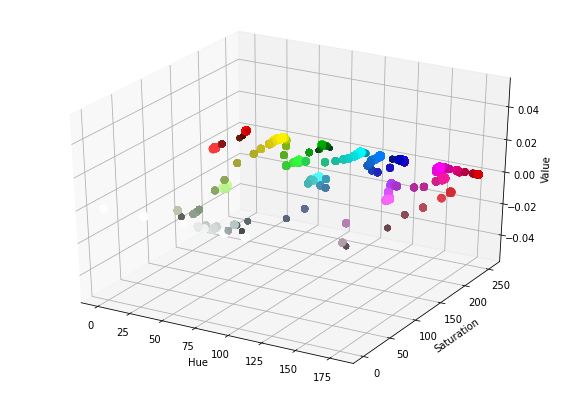

In [26]:
H,S,V = cv2.split(map_hsv)

# Plot the HSV image
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1, projection='3d')
plt.scatter(H.flatten(), S.flatten(), V.flatten(), facecolors=pixel_colors, marker=".")
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show();

Now lets try to segment maps of color `Green` in the image as a practical example of image segmentation.

In [27]:
lower_range = (52, 100, 50)
upper_range = (85, 255, 255)

mask = cv2.inRange(map_hsv, lower_range, upper_range)

lower_range, upper_range

((52, 100, 50), (85, 255, 255))

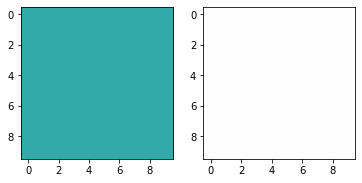

In [28]:
from matplotlib.colors import hsv_to_rgb

lower_color = np.full((10,10,3), hsv_to_rgb(lower_range), dtype=np.uint8)/255.
upper_color = np.full((10,10,3), hsv_to_rgb(upper_range),dtype=np.uint8)/255.

plt.figure()
plt.subplot(121)
plt.imshow(lower_color)

plt.subplot(122)
plt.imshow(upper_color)

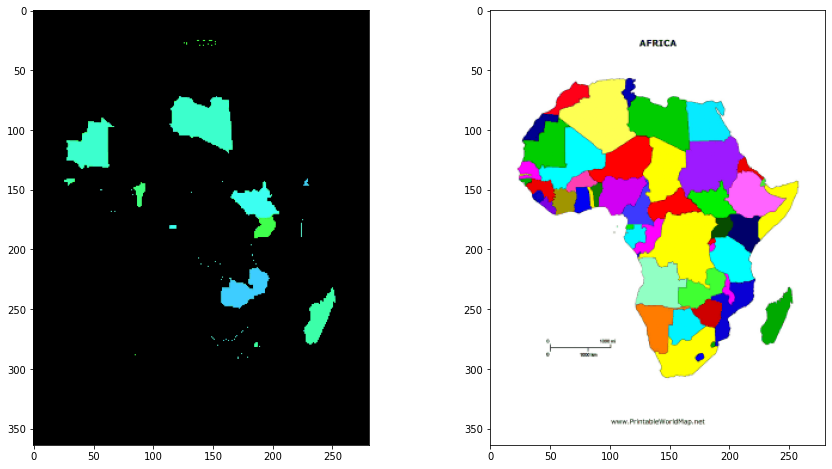

In [29]:
result_image = cv2.bitwise_and(map_hsv, map_hsv, mask=mask)

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.imshow(result_image)

plt.subplot(122)
imread = plt.imread('/content/mapAfrik.png')
plt.imshow(imread);

# Flipping image vertically

Using OpenCV


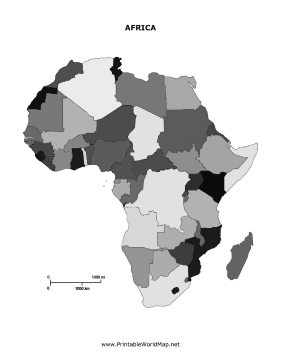

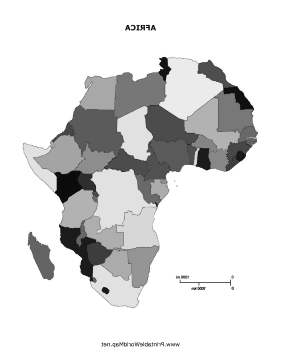

In [52]:
image = get_image('mapAfrik.png', mplt=False, grayscale=True)
new_image = np.zeros((image.shape[0],image.shape[1]), dtype='uint8')
# cv2_imshow(new_image)

for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    new_image[i, image.shape[1]-1-j] = image[i,j]

cv2_imshow(new_image)

## Image Doubling and holes

In [40]:
new_image = np.zeros((2*image.shape[0], 2*image.shape[1]), dtype='uint8')
scale = np.array([[2,0],[0,2]])
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    point = np.array([i,j])
    dot_point = scale.dot(point)
    new_i, new_j = dot_point
    new_image[new_i, new_j] = image[i,j]

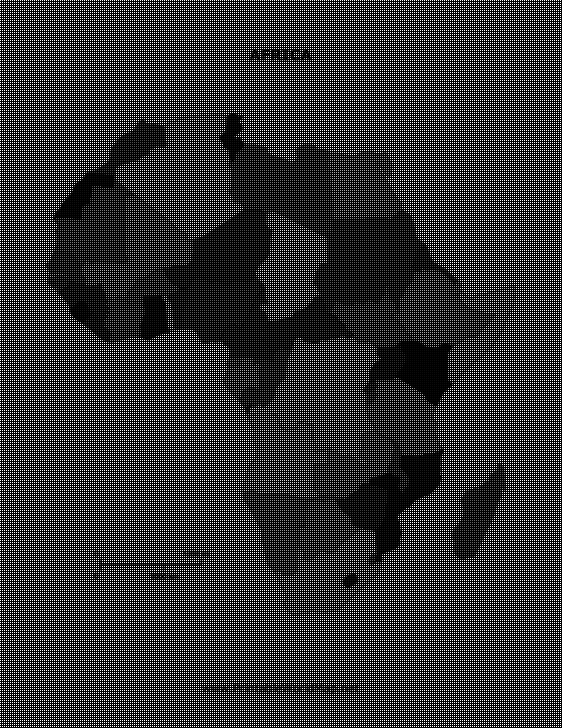

In [38]:
cv2_imshow(new_image)

## Inverse scaling

Due to the holes generated by copying the intensities from our image to our destination image which has already been scaled, some cordinates are not touched and this ends up creating a hole. 

So the aim of inverse scaling is to fill or avoid those holes while transforming our image. hope i explained it good enough 🤔

### So we will be using the nearest neighbor `interpolation`

In [ ]:
image = get_image('/content/Flowers-last-longer-Hero.jpg', grayscale=True)
new_image = np.ones((2*image.shape[0], 2*image.shape[1]), dtype='uint8')
scale = np.array([[2,0],[0,2]])
inverse_scale = np.linalg.inv(scale)

# Loop and fill our new image coordinates
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    point = np.array([i,j])
    dot_point = inverse_scale.dot(point)
    # round to the nearest neighbour as our image coordinates can't be a floating number
    new_i , new_j = np.int16(np.round(dot_point))
    new_image[i, j] = image[new_i,new_j]
image.shape

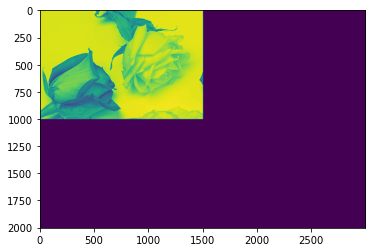

In [62]:
plt.imshow(new_image)